# Magnetic Torque-Gravity Balance Experiment

In [2]:
import numpy as np
import pandas as pd
import linear_regression as lr
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=120)

from IPython.display import Markdown, display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [3]:

class torque_balance_data:
    m = 0.00128 # MASS OF BALL
    g = 9.82
    mg = m*g
    
    

    
    def __init__(self,data_set, set_number):
        self.data_set = np.array(data_set)
        self.set_number = set_number
        self.B = self.data_set[:,1]
        self.R = self.data_set[:,0]
        
        self.slope = lr.slope(self.B,self.R)
        self.intercept = lr.intercept(self.B,self.R)
        self.slope_error = lr.slope_error(self.B,self.R)
        self.intercept_error = lr.slope_error(self.B,self.R)
        self.r = lr.r(self.B,self.R)
        
        
        self.mu = self.slope*torque_balance_data.mg
        self.mu_error = self.slope_error*torque_balance_data.mg
        

        
        
        
        
        #error analysis:
        
        
        
    def set_df(self):    #produces a dataframe with the trial data for a set
        trial_list = []
        i = 1
        for trial in self.data_set:
            trial_list.append("Trial " + str(i))
            i +=1
        col = ['R (m)', 'B (T)' , 'I (A)']
        df = pd.DataFrame(self.data_set,index = trial_list, columns = col)
        df.columns.name = 'SET  ' + str(self.set_number) 
        return df

    def summary_stats(self):
        set_name = 'Set ' + str(self.set_number)
        ind = [set_name]
        col = ['magnetic moment, $\\mu$', 'slope', 'R intercept','$r^2$']
        results = [self.mu_equation(), self.slope_equation() ,self.intercept_equation(),(self.r)**2]
        df = pd.DataFrame([results],index = ind, columns = col)
        df.columns.name = 'Summary Stats'
        return df
    
    def slope_equation(self):
        return str(round(self.slope,1)) + " $\\pm $" + str(round(self.slope_error,1)) + " $\\frac{1}{T \\cdot s}$"
        
       
    
    def intercept_equation(self):
        return str(round(self.intercept,3)) + " $\\pm $" + str(round(self.intercept_error,3)) + " $\\frac{1}{s}$"
        
    def mu_equation(self):
        return str(round(self.mu,3)) + " $\\pm $" + str(round(self.mu_error,3)) + " J/T"
       
    
    def plot(self):
     
        slope_eq = "$slope = $" + self.slope_equation()  
        mu_eq = '$\\mu = $' + self.mu_equation()
        axis_font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12,
        } 
        font_big = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16,
        }   
        B = self.B
        R = self.R
        
        plt.xlim(B.min()*.95,B.max()*1.05)
        plt.ylim(R.min()*.95, R.max()*1.05)
        plt.title("Set " + str(self.set_number) + ": R vs B", fontdict = font_big )
        plt.grid()
    #measurements scatter plot
        plt.scatter(B,R, label = "Measurements", color = 'darkred')
    
    #Best fit line:
        slope = lr.slope(B,R)
        intercept = lr.intercept(B,R)
        B_fit = np.linspace(0,B.max()*1.05)
        R_fit = B_fit*slope + intercept
        plt.plot(B_fit,R_fit, label = 'Best Fit Line', color = 'darkred')
        ax = plt.gca()
        plt.text(0.5, 0.75,slope_eq,color = 'darkred', ha='center', va='center', transform=ax.transAxes)
        plt.text(0.5,0.65,mu_eq,color = 'darkred',ha='center',va='center',transform=ax.transAxes)
        plt.ylabel('R (m)', fontdict = axis_font)
        plt.xlabel('B (T)', fontdict = axis_font)
        
        plt.legend()
        
    
        
    def residuals_vs_B(self):
        residuals = self.R - self.B*self.slope - self.intercept
        axis_font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12,
        } 
        font_big = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16,
        }   
        
        plt.hlines(0,.95*self.B.min(),1.05*self.B.max(), color = 'k')
        plt.scatter(self.B,residuals,color = 'darkred')
        plt.xlim(.95*self.B.min(),1.05*self.B.max())
        plt.grid()
        plt.xlabel('B (T)', fontdict = axis_font)
        plt.ylabel('Residual (m)\n$R-m \\cdot B-c$',fontdict = axis_font)
        plt.title('Set ' + str(self.set_number) + ": Residuals vs B", fontdict = font_big )
    
    @staticmethod
    def experiment_stats(set_list):
        ind = []
        sets = []
        col = ['magnetic moment, $\\mu$', 'slope', 'R intercept','$r^2$']
        #df = pd.DataFrame([set_stats],ind,columns = ,)
        for data_set in set_list:
            ind.append('Trial ' + str(data_set.set_number))
            sets.append(data_set.summary_stats().values[0,:])
        df = pd.DataFrame(sets,index = ind, columns = col) 
        df.columns.name = 'Summary Stats'
        return df
        
        
            
        
            
    
def printmd(string):
    display(Markdown(string))


def multi_column_df_display(list_dfs, cols=3):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))
    

### RESULTS 

SET 1,R (m),B (T),I (A)
Trial 1,0.0610,0.003809,2.78
Trial 2,0.0540,0.003562,2.60
Trial 3,0.0790,0.004658,3.40
Trial 4,0.0690,0.004247,3.10
Trial 5,0.0530,0.003425,2.50
Trial 6,0.0945,0.005069,3.70
Trial 7,0.0870,0.004521,3.30
Trial 8,0.1070,0.005206,3.80
Trial 9,0.0570,0.003562,26.00
SET 2,R (m),B (T),I (A)


Summary Stats,"magnetic moment, $\mu$",slope,R intercept,$r^2$
Trial 1,0.353 $\pm $0.03 J/T,28.1 $\pm $2.4 $\frac{1}{T \cdot s}$,-0.045 $\pm $2.424 $\frac{1}{s}$,0.950463
Trial 2,0.414 $\pm $0.008 J/T,32.9 $\pm $0.6 $\frac{1}{T \cdot s}$,-0.057 $\pm $0.627 $\frac{1}{s}$,0.997114


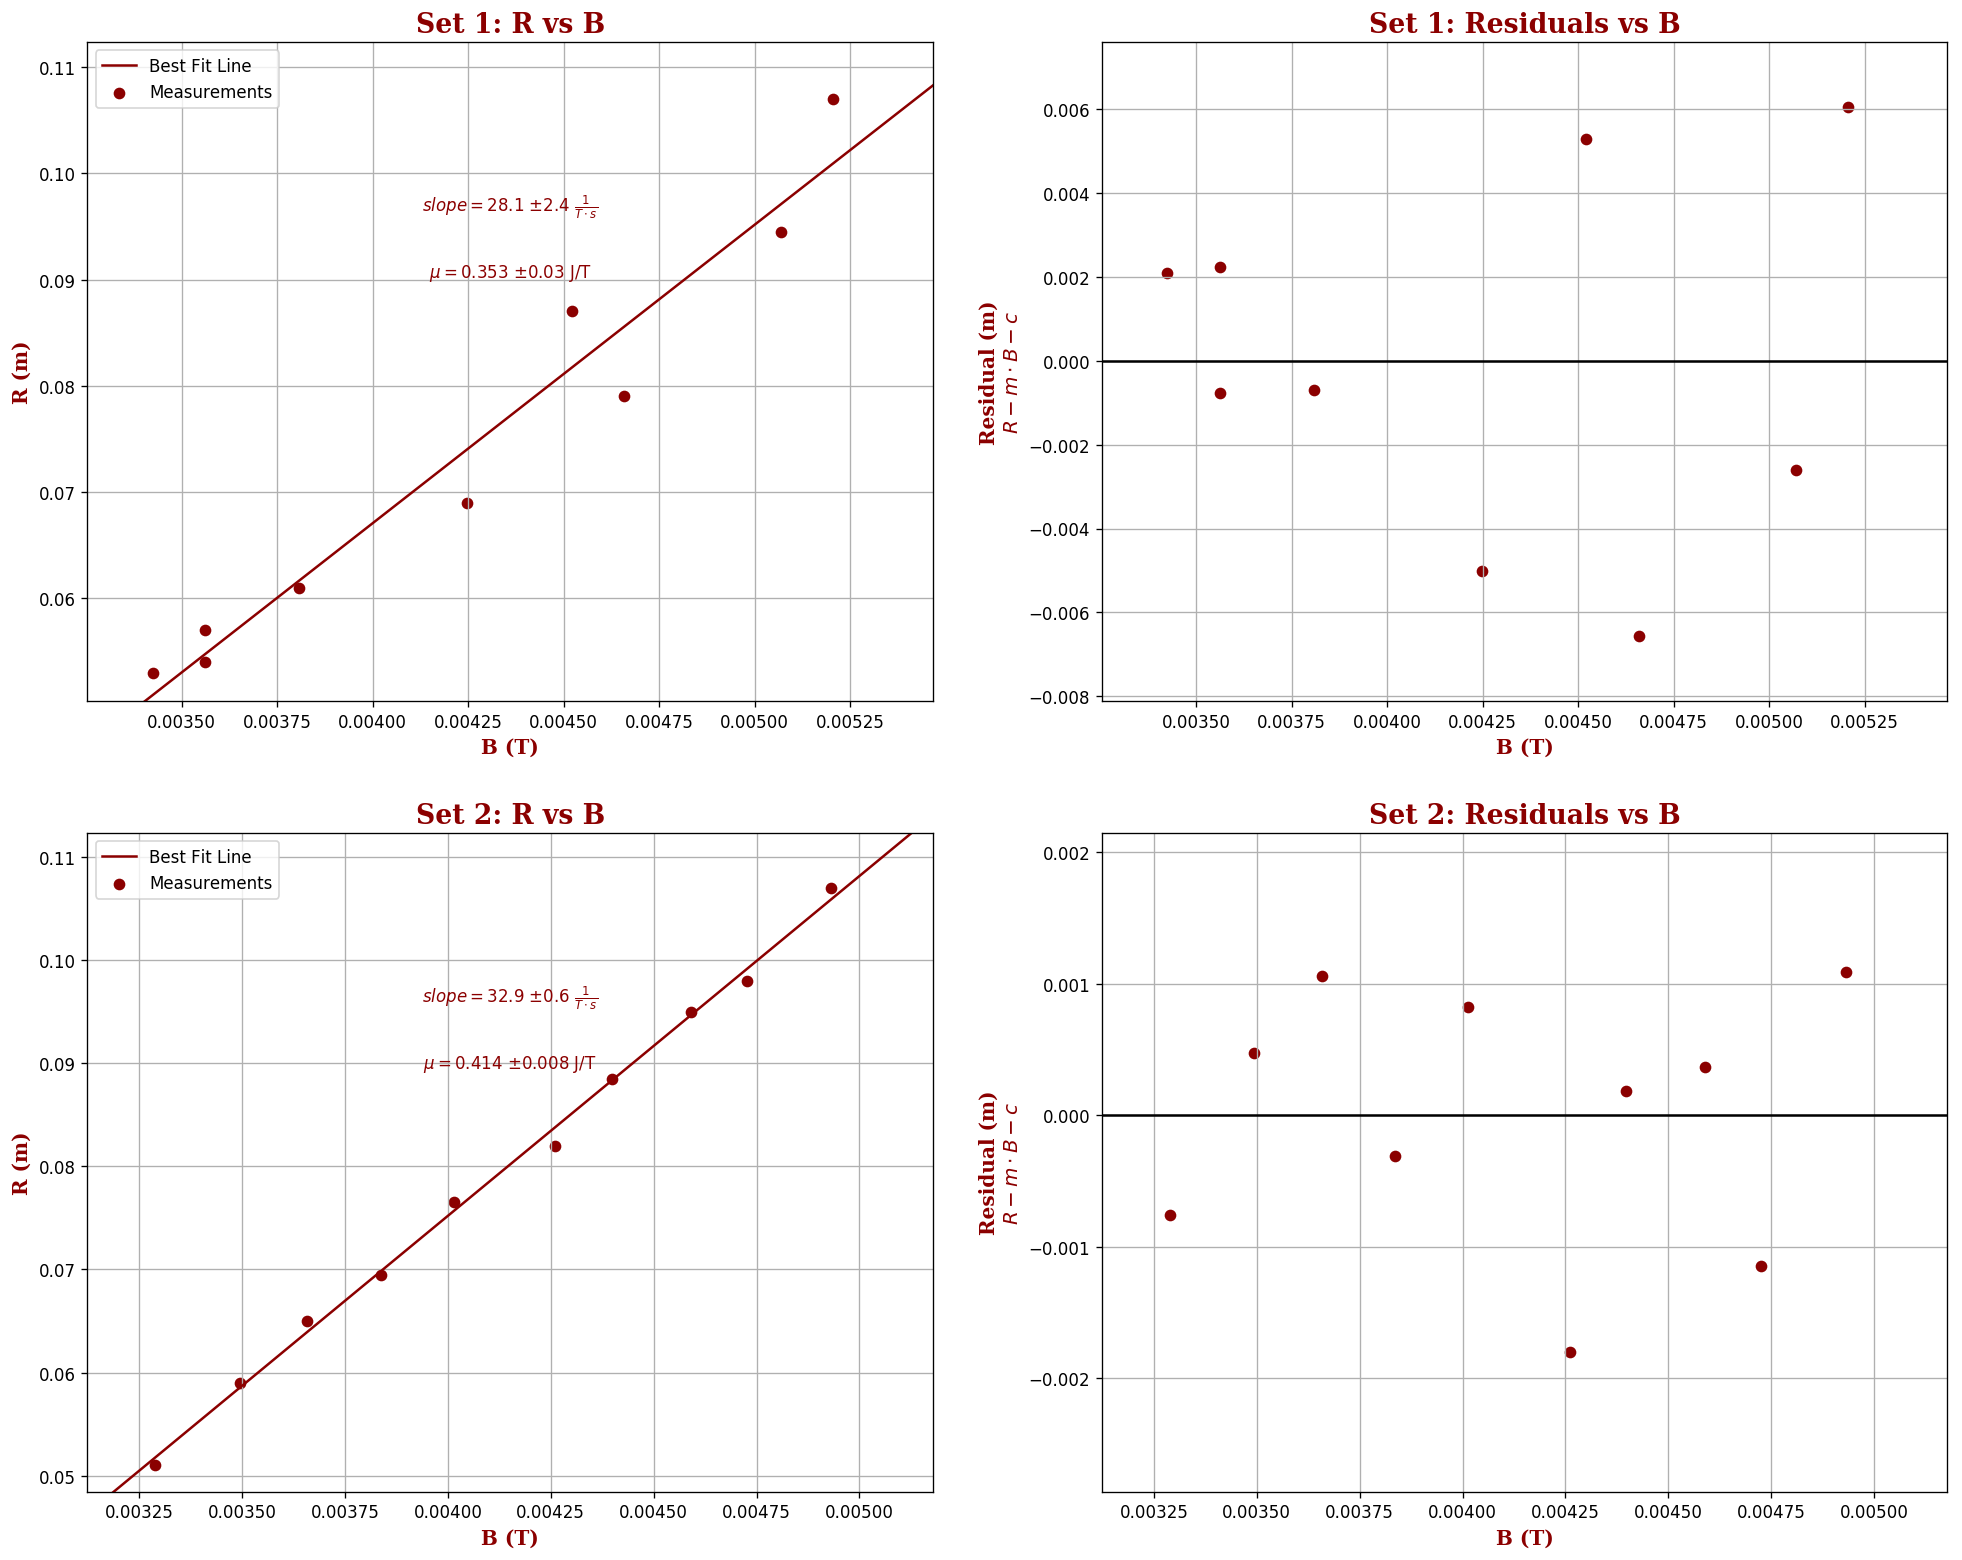

In [4]:
#TRIAL DATA
rball = 0.027 

#SET 1 
set1_data = []
set1_data.append([0.034+rball,0.00137*2.78,2.78]) #TRIAL 1
set1_data.append([0.027+rball,0.00137*2.60,2.60])#TRIAL 2
set1_data.append([0.052+rball,0.00137*3.4,3.4])  #TRIAL 3
set1_data.append([0.042+rball,0.00137*3.1,3.1])  #TRIAL 4
set1_data.append([0.026+rball,0.00137*2.5,2.5])  #TRIAL 5
set1_data.append([0.0675+rball,0.00137*3.7,3.7]) #TRIAL 6
set1_data.append([0.06+rball,0.00137*3.3,3.3])   #TRIAL 7
set1_data.append([0.08+rball,0.00137*3.8,3.8])   #TRIAL 8
set1_data.append([0.03+rball,0.00137*2.6,26])   #TRIAL 9

#SET 2
set2_data = []
set2_data.append([0.024+rball,0.00137*2.4,2.4]) #TRIAL 1
set2_data.append([0.032+rball,0.00137*2.55,2.55])#TRIAL 2
set2_data.append([0.038+rball,0.00137*2.67,2.67])  #TRIAL 3
set2_data.append([0.0425+rball,0.00137*2.8,2.8])  #TRIAL 4
set2_data.append([0.0495+rball,0.00137*2.93,2.93])  #TRIAL 5
set2_data.append([0.055+rball,0.00137*3.11,3.11]) #TRIAL 6
set2_data.append([0.0615+rball,0.00137*3.21,3.21])   #TRIAL 7
set2_data.append([0.068+rball,0.00137*3.35,3.35])   #TRIAL 8
set2_data.append([0.071+rball,0.00137*3.45,3.45])   #TRIAL 9
set2_data.append([0.080+rball,0.00137*3.60,3.60])  #TRIAL 10

#Set Objects
set1 = torque_balance_data(data_set = set1_data,set_number = 1)
set2 = torque_balance_data(data_set = set2_data,set_number = 2)
#Set Measurements DataFrame
printmd('### RESULTS ')

#Measurement dataframes
set1_measurements = set1.set_df() 
set2_measurements = set2.set_df()

#Set Analaysis Data Frames
multi_column_df_display([set1_measurements,set2_measurements])


#Summary Stats From Both Sets
display(torque_balance_data.experiment_stats([set1,set2]))

#Set plots
plt.figure(figsize = (20,16))
plt.subplot(2,2,1)
set1.plot()
plt.subplot(2,2,2)
set1.residuals_vs_B()
plt.subplot(2,2,3)
set2.plot()
plt.subplot(2,2,4)
set2.residuals_vs_B()
plt.savefig('graphs/torquebalance/resultsgraph.png')

